Подробная информация о персонажах фильмов Marvel, включая названия фильмов и их персонажей, а также внешний вид актёров, и когда они впервые появились на экране.

In [1]:
import numpy as np 
import pandas as pd
import re
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
marvel=pd.read_csv('Marvel Movies.csv', encoding = "cp1251", sep = ',' )
marvel.head(10)

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
5,Benjamin Grimm (Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,Nov-61,1961.0
6,Reed Richards (Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2072.0,Nov-61,1961.0
7,Hulk (Robert Bruce Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2017.0,May-62,1962.0
8,Scott Summers (Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1955.0,Sep-63,1963.0
9,Jonathan Storm (Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1934.0,Nov-61,1961.0


In [4]:
marvel.shape

(16376, 11)

In [5]:
marvel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16376 non-null  object 
 1   ID                12606 non-null  object 
 2   ALIGN             13564 non-null  object 
 3   EYE               6609 non-null   object 
 4   HAIR              12112 non-null  object 
 5   SEX               15522 non-null  object 
 6   GSM               90 non-null     object 
 7   ALIVE             16373 non-null  object 
 8   APPEARANCES       15280 non-null  float64
 9   FIRST APPEARANCE  15561 non-null  object 
 10  Year              15561 non-null  float64
dtypes: float64(2), object(9)
memory usage: 1.4+ MB


Я обнаружил, что имя персонажа рядом с настоящим именем выглядит плохо, я думаю, будет лучше, если мы отделим имя персонажа.

In [6]:
nicknames=[]
names=[]
for name in marvel.name:
   match= re.search("\((?:(?!\))(?:.|\n))*\)",name)
   if match:
    nickname=name[match.start()+1:match.end()-1]
    newname=name.replace(name[match.start():match.end()],"")
    names.append(newname)
    nicknames.append(nickname)
   else:
    names.append(np.nan)
    nicknames.append(np.nan)

In [7]:
marvel['nicknames']=names
marvel['name']=nicknames
marvel.head()

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,nicknames
0,Peter Parker,Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,Spider-Man
1,Steven Rogers,Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0,Captain America
2,"James \""Logan\"" Howlett",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0,Wolverine
3,"Anthony \""Tony\"" Stark",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0,Iron Man
4,Thor Odinson,No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0,Thor


# 1) Какой пол самый популярный

In [8]:
gendre=marvel.SEX.value_counts()
px.bar(gendre,text_auto='.4s')

# 2) Доля живых и умерших

In [9]:
marvel.ALIVE.unique()

array(['Living Characters', 'Deceased Characters', nan], dtype=object)

In [10]:
len(marvel[marvel['ALIVE']=="Living Characters"])/len(marvel)

0.7699071812408402

In [11]:
len(marvel[marvel['ALIVE']=="Deceased Characters"])/len(marvel)

0.22990962383976551

Большинство персонажей еще живы

# 3) Появление  новых персонажей на протяжении лет.

In [12]:
years=marvel.Year.value_counts().sort_index()
px.line(years)

Пик пришолся на 1993 год

# 4) Наиболее часто используемый тип глаз.

In [13]:
eye=marvel.EYE.value_counts().sort_values().head()
px.bar(eye,orientation='h')

# 5) Наиболее часто используемый тип волос

In [14]:
hair=marvel.HAIR.value_counts().sort_values(ascending=False)
px.bar(hair)

# 6) Соотношение цвета глаз и цвета волос

In [15]:
marvel.groupby(['EYE','HAIR']).count().name.nlargest(10)

EYE         HAIR      
Brown Eyes  Black Hair    824
            Brown Hair    655
Blue Eyes   Blond Hair    648
            Black Hair    391
            Brown Hair    294
Black Eyes  Black Hair    257
Red Eyes    No Hair       186
Green Eyes  No Hair       153
Brown Eyes  Bald          137
Blue Eyes   White Hair    132
Name: name, dtype: int64

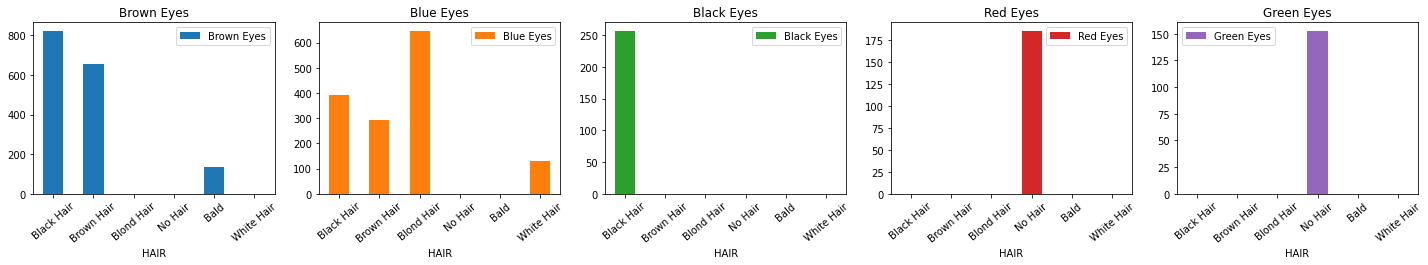

In [16]:
dfg=marvel.groupby(['EYE','HAIR']).count().name.nlargest(10)
ax = dfg.unstack(level=0).plot(kind='bar', subplots=True, rot=40, figsize=(20, 20), layout=(6, 5))
plt.tight_layout()